In [217]:
import pandas as pd
data=pd.read_csv('telecom_customer_churn.csv')
data.head(10)
print(data.columns.tolist())

['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason']


In [218]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [220]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [221]:
data.drop(["Churn Category","Churn Reason","Customer ID", "Zip Code", "Latitude", "Longitude"],axis=1,inplace=True)

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  6361 non-null   float64
 10  Multiple Lines                     6361 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [223]:
print(data.isnull().sum())

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                 

#### we have lots of missing values in many columns , so first we will clean them 

In [224]:
print(data['Internet Service'].isnull().sum())

0


In [225]:
columns_meidan=['Avg Monthly Long Distance Charges','Avg Monthly GB Download']
for col in columns_meidan:
    data[col].fillna(data[col].median(),inplace=True)


In [226]:
columns_mode = ['Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data','Premium Tech Support'
,'Device Protection Plan','Online Backup','Online Security','Internet Type','Multiple Lines','Offer']

for col in columns_mode:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Fill missing values with mode


In [227]:
# data['Streaming TV']
# data['Streaming Movies']
# data['Streaming Music']
# data['Unlimited Data']
# data['Churn Category']
# data['Churn Reason']

In [228]:
data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

#### we have successfully cleaned all the data 


#### Now we will do Encoding here 

In [230]:
label_encoder = {}
for col in ['Paperless Billing','Phone Service','Internet Type','Offer','City','Gender', 'Married', 'Payment Method', 'Customer Status','Offer',  'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract']:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoder[col]=le
le

LabelEncoder()

#### feature scaling for better model performance

In [231]:
scaler=StandardScaler()
num_cols = ['Monthly Charge', 'Total Charges', 'Total Revenue', 'Total Extra Data Charges', 'Total Long Distance Charges']
data[num_cols] = scaler.fit_transform(data[num_cols])

#### Splitting the da for traning and testing

In [232]:
X=data.drop(columns=['Customer Status'])
y=data['Customer Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

In [233]:
print(X_train.shape, y_train.shape)  # Should output valid dimensions

(5634, 31) (5634,)


In [234]:
# print(X_train.dtypes)  # Check data types of all columns
print(X_train.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [235]:
for col in X_train.columns:
    unique_types = X_train[col].apply(type).unique()
    if any(t == str for t in unique_types):
        print(f"Column '{col}' contains string values")

In [236]:
# data['Paperless Billing']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int64  
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   int64  
 8   Phone Service                      7043 non-null   int64  
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   int32  
 11  Internet Service                   7043 non-null   int32

In [237]:
print(X_train.iloc[:5])  # See the first 5 rows of X_train

      Gender  Age  Married  Number of Dependents  City  Number of Referrals  \
2142       1   38        1                     2  1072                    1   
1623       1   22        0                     0   854                    0   
6074       0   53        1                     0   725                    2   
1362       0   54        0                     0   200                    0   
6754       0   38        1                     0   998                    8   

      Tenure in Months  Offer  Phone Service  \
2142                 3      4              1   
1623                36      2              1   
6074                49      1              1   
1362                 7      1              1   
6754                 2      4              1   

      Avg Monthly Long Distance Charges  ...  Unlimited Data  Contract  \
2142                              33.30  ...               1         0   
1623                              43.97  ...               1         0   
6074          

#### Traning the RandomForest Model

In [238]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

#### Now Evaluating the Model

In [239]:
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8360539389638041

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.61      0.66       373
           1       0.73      0.65      0.69        97
           2       0.88      0.95      0.91       939

    accuracy                           0.84      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.83      0.84      0.83      1409


Confusion Matrix:
 [[226  23 124]
 [ 34  63   0]
 [ 50   0 889]]


#### We have completed traning the model and got an amazing accuracy of 83 percent

#### Now let's check the importance of each feature 

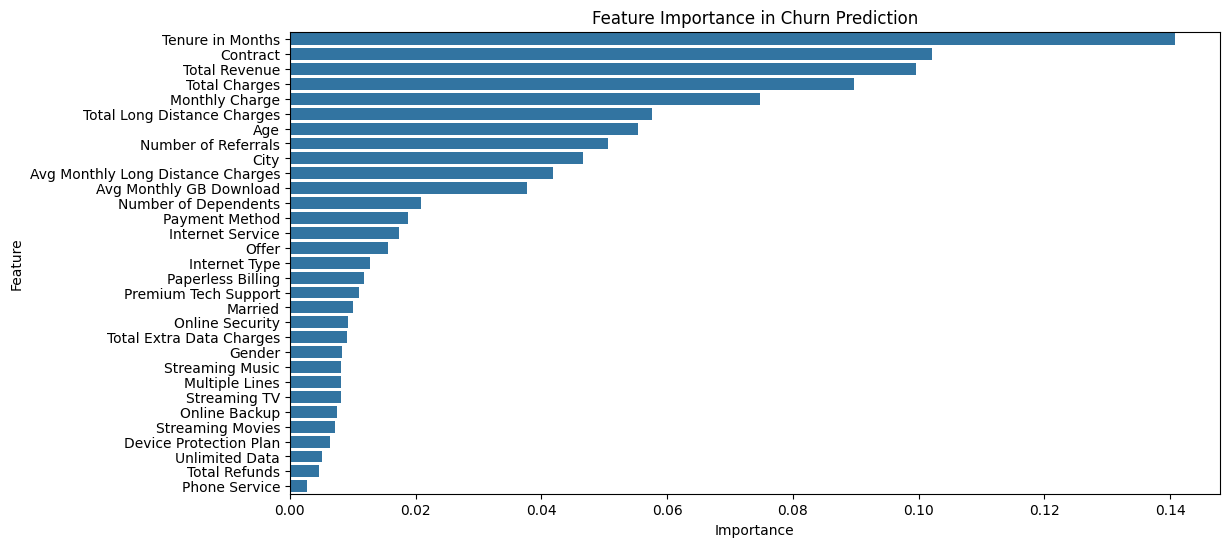

In [240]:
importances=model.feature_importances_
feature_names=X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in Churn Prediction")
plt.show()

### From the above plot we can identify that 'Tenure in Months' has the heighest importance among the features that contribute to the Churn Prediction.

our model is 83% but struggles a bit with correctly identifying "Stayed" customers. Now we will Fine-tune the model and re-evaluating feature importance it could increase the performance  even further!  

## HyperParamater Tuning / Optimization

#### We’ll use RandomizedSearchCV to efficiently find the best parameters for our Random Forest Classifier.

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

hyper_paramater_grid={
'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

model=RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=hyper_paramater_grid,
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


### Checking the feauture importance

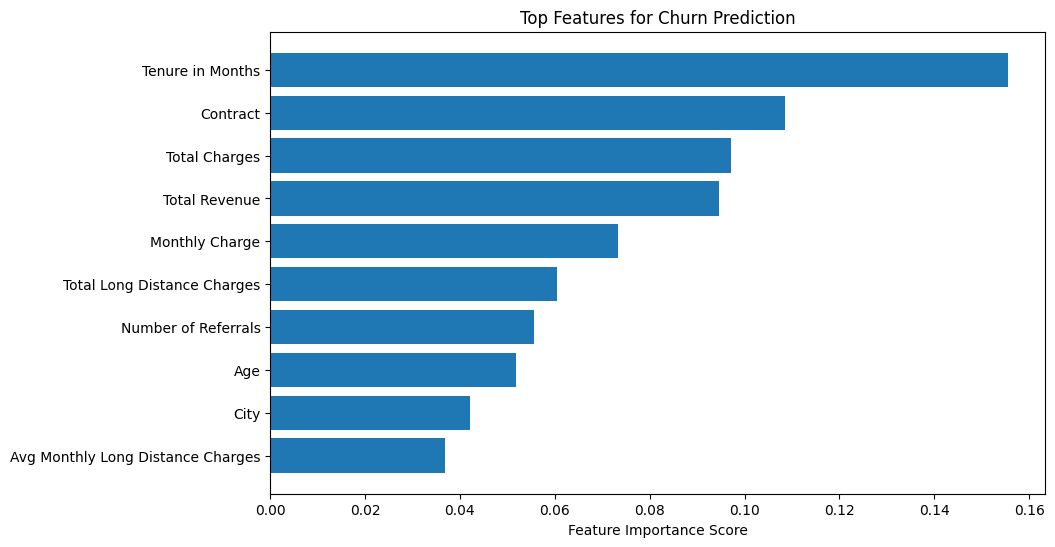

In [242]:
# Train model with best parameters
best_model = random_search.best_estimator_
feature_importances = best_model.feature_importances_

indices = np.argsort(feature_importances)[::-1]
top_n = 10  

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[indices[:top_n]], align='center')
plt.yticks(range(top_n), [X_train.columns[i] for i in indices[:top_n]])
plt.xlabel("Feature Importance Score")
plt.title("Top Features for Churn Prediction")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [3]:
! pip install networkx 

Defaulting to user installation because normal site-packages is not writeable
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


KeyError: 'Multi-Agent\nCoordination'

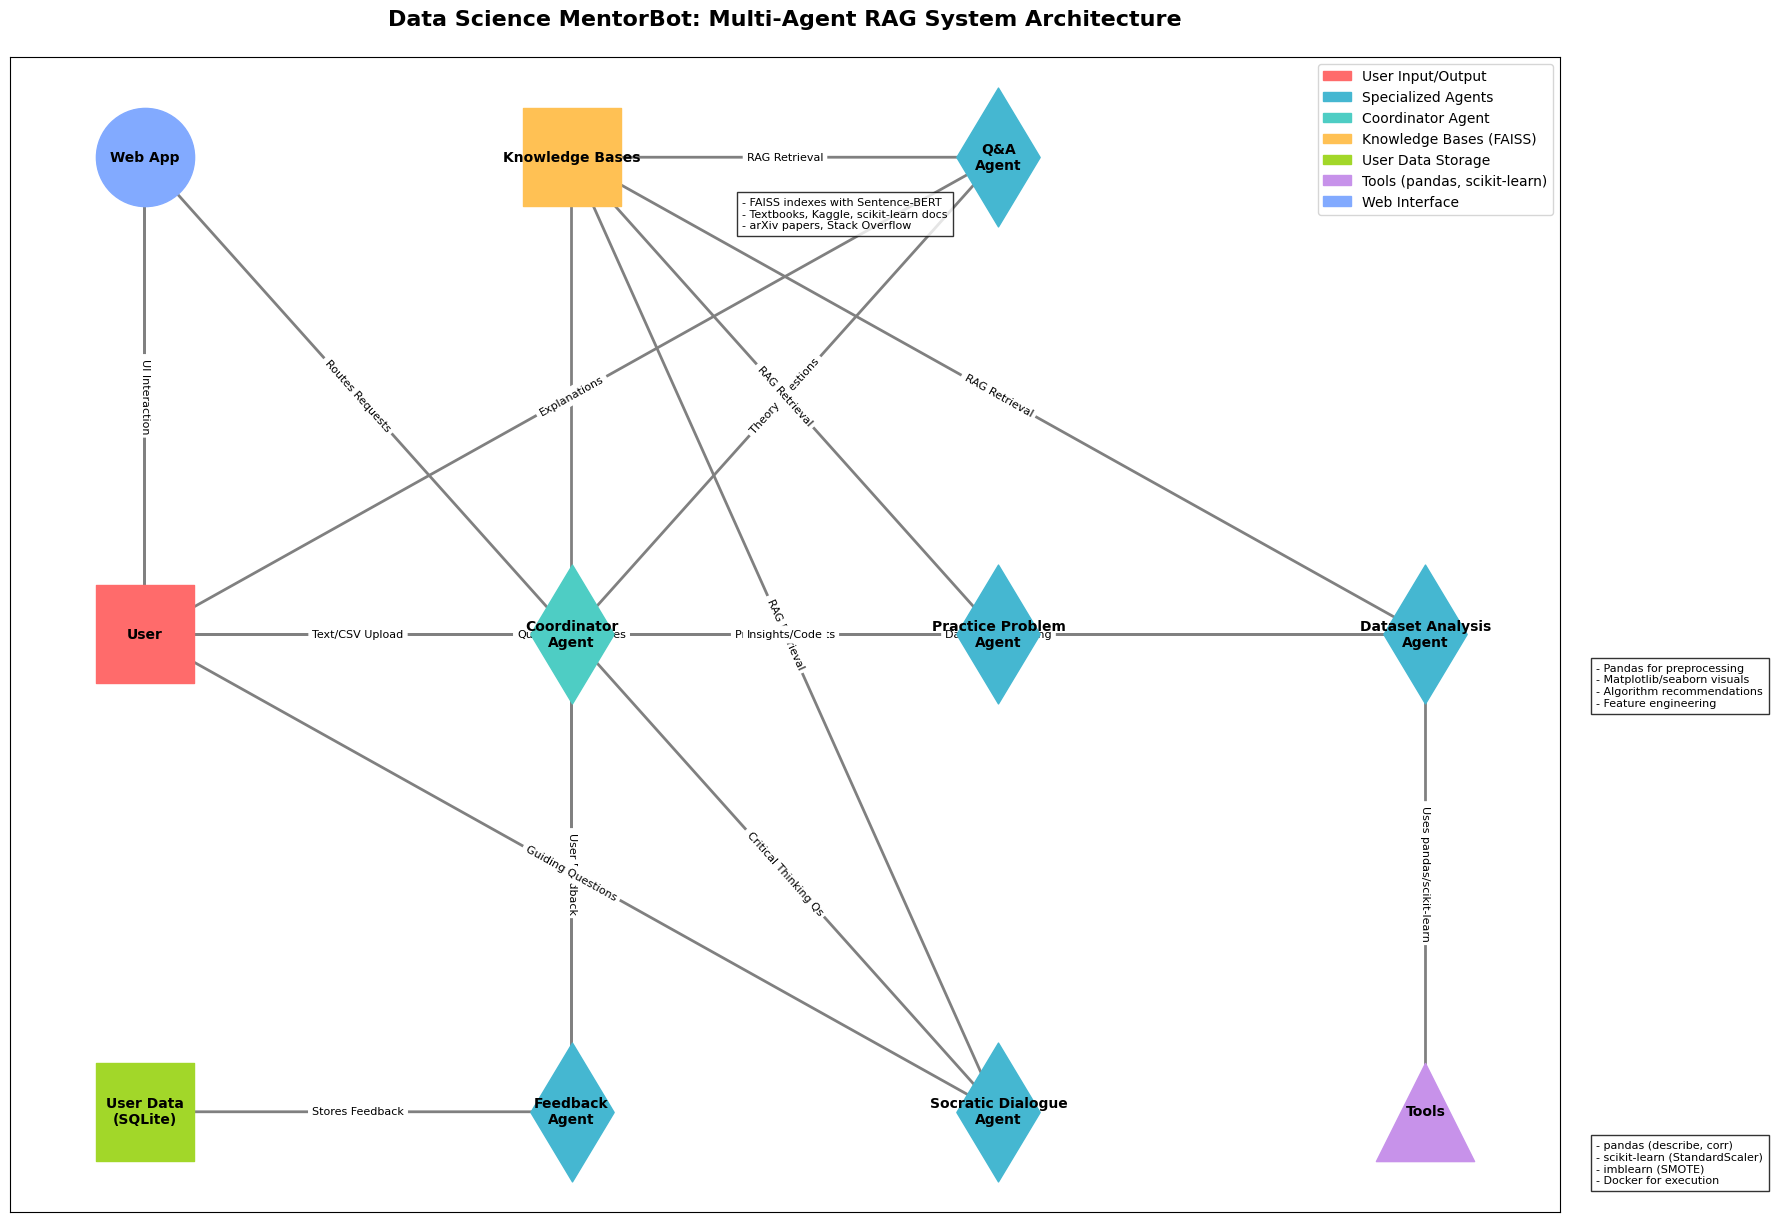

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Rectangle, Circle, ArrowStyle

plt.figure(figsize=(20, 15))
plt.title("Data Science MentorBot: Multi-Agent RAG System Architecture\n", fontsize=16, fontweight='bold')

# Create a directed graph
G = nx.DiGraph()

# Define nodes with types and positions
nodes = {
    "User": {"type": "input", "pos": (1, 5), "color": "#FF6B6B"},
    "Coordinator\nAgent": {"type": "agent", "pos": (4, 5), "color": "#4ECDC4"},
    "Q&A\nAgent": {"type": "agent", "pos": (7, 7), "color": "#45B7D1"},
    "Practice Problem\nAgent": {"type": "agent", "pos": (7, 5), "color": "#45B7D1"},
    "Socratic Dialogue\nAgent": {"type": "agent", "pos": (7, 3), "color": "#45B7D1"},
    "Dataset Analysis\nAgent": {"type": "agent", "pos": (10, 5), "color": "#45B7D1"},
    "Feedback\nAgent": {"type": "agent", "pos": (4, 3), "color": "#45B7D1"},
    "Knowledge Bases": {"type": "database", "pos": (4, 7), "color": "#FFC154"},
    "User Data\n(SQLite)": {"type": "database", "pos": (1, 3), "color": "#A2D729"},
    "Tools": {"type": "tools", "pos": (10, 3), "color": "#C792EA"},
    "Web App": {"type": "interface", "pos": (1, 7), "color": "#82AAFF"}
}

# Add nodes to graph
for node, attrs in nodes.items():
    G.add_node(node, pos=attrs["pos"], color=attrs["color"])

# Define edges with labels
edges = [
    ("User", "Coordinator\nAgent", "Text/CSV Upload"),
    ("Coordinator\nAgent", "Q&A\nAgent", "Theory Questions"),
    ("Coordinator\nAgent", "Practice Problem\nAgent", "Problem Requests"),
    ("Coordinator\nAgent", "Socratic Dialogue\nAgent", "Critical Thinking Qs"),
    ("Coordinator\nAgent", "Dataset Analysis\nAgent", "Dataset Processing"),
    ("Q&A\nAgent", "Knowledge Bases", "RAG Retrieval"),
    ("Practice Problem\nAgent", "Knowledge Bases", "RAG Retrieval"),
    ("Socratic Dialogue\nAgent", "Knowledge Bases", "RAG Retrieval"),
    ("Dataset Analysis\nAgent", "Knowledge Bases", "RAG Retrieval"),
    ("Dataset Analysis\nAgent", "Tools", "Uses pandas/scikit-learn"),
    ("Feedback\nAgent", "Knowledge Bases", "Updates KB"),
    ("Feedback\nAgent", "User Data\n(SQLite)", "Stores Feedback"),
    ("Web App", "User", "UI Interaction"),
    ("User", "Web App", "Input/Upload"),
    ("Web App", "Coordinator\nAgent", "Routes Requests"),
    ("Coordinator\nAgent", "Feedback\nAgent", "User Feedback"),
    ("Q&A\nAgent", "User", "Explanations"),
    ("Practice Problem\nAgent", "User", "Quizzes/Challenges"),
    ("Socratic Dialogue\nAgent", "User", "Guiding Questions"),
    ("Dataset Analysis\nAgent", "User", "Insights/Code")
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Draw nodes with different shapes
pos = nx.get_node_attributes(G, 'pos')
colors = nx.get_node_attributes(G, 'color')

# Draw different node types with shapes
for node in G.nodes():
    if nodes[node]["type"] == "input":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape='s', node_size=5000, node_color=colors[node])
    elif nodes[node]["type"] == "agent":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape='d', node_size=5000, node_color=colors[node])
    elif nodes[node]["type"] == "database":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape='s', node_size=5000, node_color=colors[node])
    elif nodes[node]["type"] == "tools":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape='^', node_size=5000, node_color=colors[node])
    else:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape='o', node_size=5000, node_color=colors[node])

# Draw edges with labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, edge_color='gray', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add legend
legend_elements = [
    Rectangle((0,0), 1, 1, color='#FF6B6B', label='User Input/Output'),
    Rectangle((0,0), 1, 1, color='#45B7D1', label='Specialized Agents'),
    Rectangle((0,0), 1, 1, color='#4ECDC4', label='Coordinator Agent'),
    Rectangle((0,0), 1, 1, color='#FFC154', label='Knowledge Bases (FAISS)'),
    Rectangle((0,0), 1, 1, color='#A2D729', label='User Data Storage'),
    Rectangle((0,0), 1, 1, color='#C792EA', label='Tools (pandas, scikit-learn)'),
    Rectangle((0,0), 1, 1, color='#82AAFF', label='Web Interface')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Add component details
component_details = {
    "Knowledge Bases": "- FAISS indexes with Sentence-BERT\n- Textbooks, Kaggle, scikit-learn docs\n- arXiv papers, Stack Overflow",
    "Dataset Analysis\nAgent": "- Pandas for preprocessing\n- Matplotlib/seaborn visuals\n- Algorithm recommendations\n- Feature engineering",
    "Tools": "- pandas (describe, corr)\n- scikit-learn (StandardScaler)\n- imblearn (SMOTE)\n- Docker for execution",
    "Multi-Agent\nCoordination": "- LangGraph for workflows\n- Dynamic agent activation\n- Context sharing\n- Feedback integration"
}

for node, detail in component_details.items():
    x, y = pos[node]
    plt.text(x + 1.2, y - 0.3, detail, fontsize=8, bbox=dict(facecolor='white', alpha=0.8))

# Add architecture notes
plt.text(1, 1, "Key Architectural Features:\n"
               "- Multi-agent RAG system with specialized agents\n"
               "- CPU-efficient design (quantized DistilBERT/TinyLLaMA)\n"
               "- Chunked processing for 2GB datasets\n"
               "- Feedback-driven knowledge base updates\n"
               "- Collaborative agent reasoning via LangGraph",
         fontsize=10, bbox=dict(facecolor='#f0f0f0', alpha=0.8))

plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.savefig("mentorbot_architecture.png", dpi=300, bbox_inches='tight')
plt.show()